In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


All the patients suffered heart attacks at some point in the past. Some are still alive and some are not. The survival and still-alive variables, when taken together, indicate whether a patient survived for at least one year following the heart attack.
The problem addressed by past researchers was to predict from the other variables whether or not the patient will survive at least one year. The most difficult part of this problem is correctly predicting that the patient will NOT survive. (Part of the difficulty seems to be the size of the data set.)
survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.


   1. survival -- the number of months patient survived (has survived, if patient is still alive).  Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive.  Check the second variable to confirm this.  Such patients cannot be used for the prediction task mentioned above.
   2. still-alive -- a binary variable.  0=dead at end of survival period, 1 means still alive
   3. age-at-heart-attack -- age in years when heart attack occurred
   4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart.  0=no fluid, 1=fluid
   5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal
   6. epss -- E-point septal separation, another measure of contractility.  Larger numbers are increasingly abnormal.
   7. lvdd -- left ventricular end-diastolic dimension.  This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
   8. wall-motion-score -- a measure of how the segments of the left ventricle are moving
   9. wall-motion-index -- equals wall-motion-score divided by number of segments seen.  Usually 12-13 segments are seen in an echocardiogram.  Use this variable INSTEAD of the wall motion score.
   10. mult -- a derivate var which can be ignored
   11. name -- the name of the patient (I have replaced them with "name")
   12. group -- meaningless, ignore it
   13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year.  1 means patient was alive at 1 year.



In [54]:
#Load data from csv and store it in a dataframe
data = pd.read_csv("echocardiogram.data", skiprows=1, delimiter=',')
display(data)

,19,0,72,0.1,0.380,6,4.100,14,1.700,0.588,name,1,0.2
0,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
1,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
2,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
3,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0
4,13,0,62,0,0.230,31,5.430,22.5,1.875,0.857,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
126,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
127,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
128,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


In [55]:
features=['Survival', 'Still-Alive', 'Age-At-Heart-Attack', 'Pericardial-effusion','Fractional-Shortening', 'EPSS', 'LVDD', 'Wall-Motion-Score', 'Wall-Motion-Index', 'Mult', 'Name', 'Group', 'Alive-At1']
data = pd.read_csv("echocardiogram.data", header=None, names=features, delimiter=',')
data.head()

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index,Mult,Name,Group,Alive-At1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [56]:
#Remove useless data (indicated in the description of the dataset)
columns_to_remove = ['Mult', 'Name', 'Group']
data = data.drop(columns=columns_to_remove, axis=0)
data.head()

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index,Alive-At1
0,11,0,71,0,0.260,9,4.600,14,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0
2,16,0,55,0,0.260,4,3.420,14,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0


# a) Descriptive analysis of the database.

In [57]:
# Number of entries in the dataset
print("This data frame is made of", data.shape[0],"entries, and", data.shape[1], "features" )

This data frame is made of 132 entries, and 10 features


In [58]:
#Types of data
print(data.dtypes)

Survival                 object
Still-Alive              object
Age-At-Heart-Attack      object
Pericardial-effusion     object
Fractional-Shortening    object
EPSS                     object
LVDD                     object
Wall-Motion-Score        object
Wall-Motion-Index        object
Alive-At1                object
dtype: object


In [59]:
(data=='?').sum(axis=0)

Survival                  2
Still-Alive               1
Age-At-Heart-Attack       5
Pericardial-effusion      1
Fractional-Shortening     8
EPSS                     15
LVDD                     11
Wall-Motion-Score         4
Wall-Motion-Index         1
Alive-At1                58
dtype: int64

## Remove all the '?' of the dataframe

In [60]:
data.replace('?', pd.NA, inplace=True)
display(data)

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index,Alive-At1
0,11,0,71,0,0.260,9,4.600,14,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0
2,16,0,55,0,0.260,4,3.420,14,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0
...,...,...,...,...,...,...,...,...,...,...
127,7.5,1,64,0,0.24,12.9,4.72,12,1,NaN
128,41,0,64,0,0.28,5.40,5.47,11,1.10,NaN
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,NaN
130,22,0,57,0,0.14,16.1,4.36,15,1.36,NaN


In [61]:
data=data.apply(lambda col:pd.to_numeric(col, errors='coerce')).astype('Float64')
print(data.dtypes)

Survival                 Float64
Still-Alive              Float64
Age-At-Heart-Attack      Float64
Pericardial-effusion     Float64
Fractional-Shortening    Float64
EPSS                     Float64
LVDD                     Float64
Wall-Motion-Score        Float64
Wall-Motion-Index        Float64
Alive-At1                Float64
dtype: object


## Describe the input sets

In [62]:
data.describe() 

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index,Alive-At1
count,130.0,131.0,127.0,131.0,124.0,117.0,121.0,128.0,131.0,74.0
mean,22.182923,0.328244,62.925425,0.183206,0.216734,12.164769,4.763157,14.438125,1.382748,0.324324
std,15.858267,0.471377,8.403757,0.38832,0.107513,7.370159,0.810013,5.018566,0.453378,0.471317
min,0.03,0.0,35.0,0.0,0.01,0.0,2.32,2.0,1.0,0.0
25%,7.875,0.0,57.0,0.0,0.15,7.0,4.23,11.0,1.0,0.0
50%,23.5,0.0,62.0,0.0,0.205,11.0,4.65,14.0,1.222,0.0
75%,33.0,1.0,68.0,0.0,0.27,16.1,5.3,16.5,1.535,1.0
max,57.0,1.0,86.0,1.0,0.61,40.0,6.78,39.0,3.0,1.0


In [63]:
nan_counts = data.isna().sum()
print("Number of NaN values in the data:", nan_counts)

Number of NaN values in the data: Survival                  2
Still-Alive               1
Age-At-Heart-Attack       5
Pericardial-effusion      1
Fractional-Shortening     8
EPSS                     15
LVDD                     11
Wall-Motion-Score         4
Wall-Motion-Index         1
Alive-At1                58
dtype: int64


# c) Visualize the data
## Histograms


array([[<Axes: title={'center': 'Survival'}>,
        <Axes: title={'center': 'Still-Alive'}>,
        <Axes: title={'center': 'Age-At-Heart-Attack'}>],
       [<Axes: title={'center': 'Pericardial-effusion'}>,
        <Axes: title={'center': 'Fractional-Shortening'}>,
        <Axes: title={'center': 'EPSS'}>],
       [<Axes: title={'center': 'LVDD'}>,
        <Axes: title={'center': 'Wall-Motion-Score'}>,
        <Axes: title={'center': 'Wall-Motion-Index'}>],
       [<Axes: title={'center': 'Alive-At1'}>, <Axes: >, <Axes: >]],
      dtype=object)

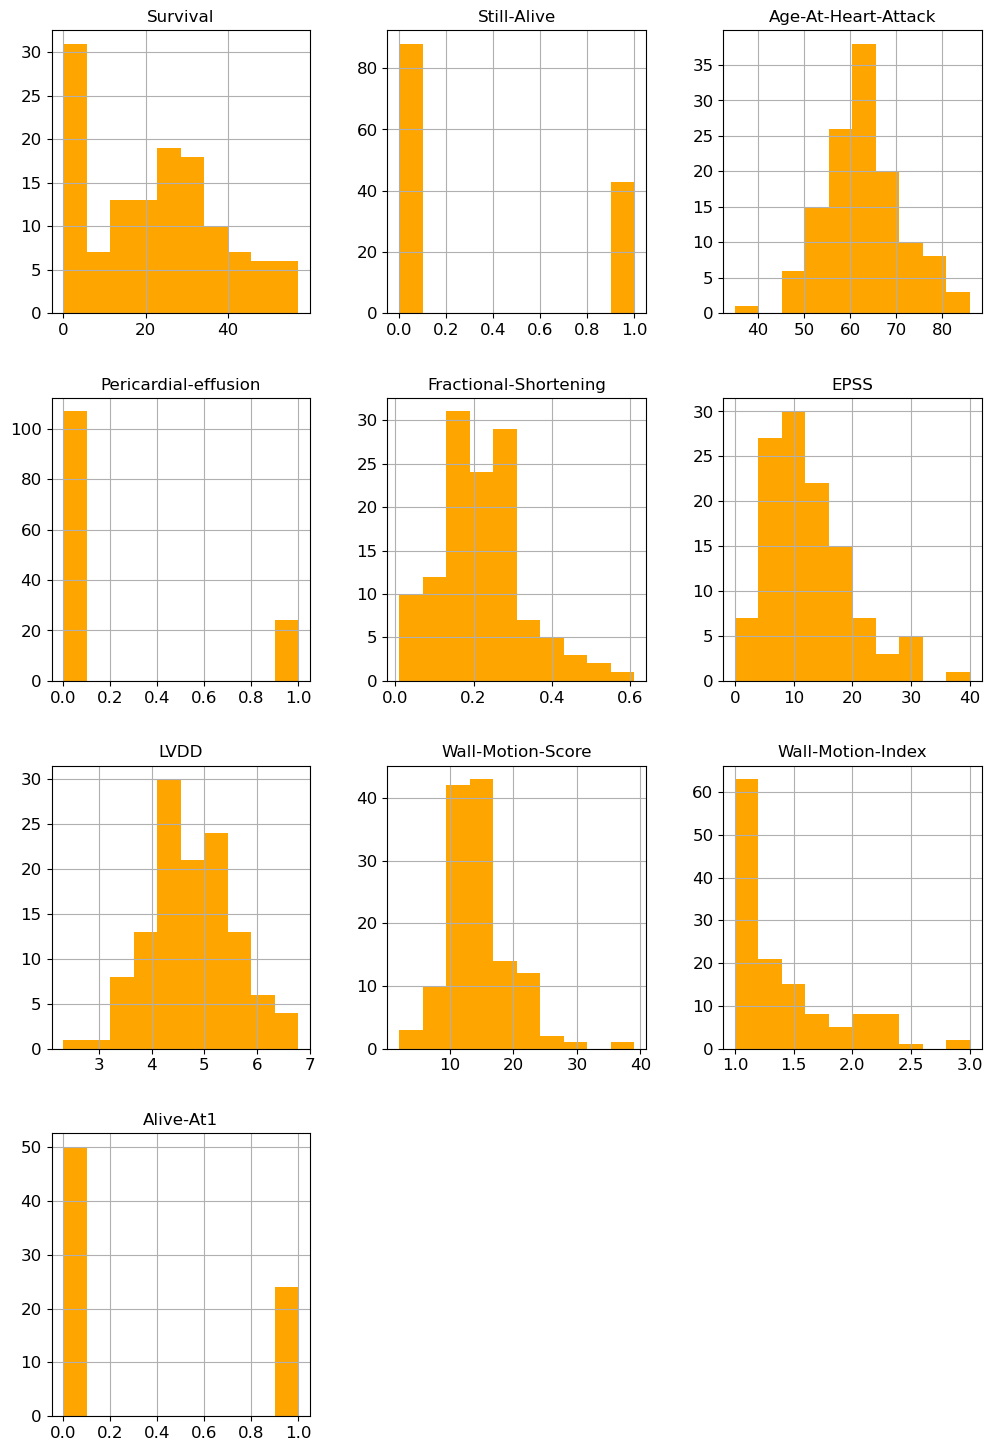

In [64]:
data.hist(bins=10, figsize=(12, 18), xlabelsize=12, ylabelsize=12, color='orange') # Plot a histogram for each feature. Define the size of the figure (12,18); change the number of bins as well and the xlabel and ylabel sizes

We drop the NaN values as the next plots does not allow them

In [65]:
data_wout_nan = data.dropna()
print("Number of NaN values in the training set:\n", data_wout_nan.isna().sum()) # checking that there is no more NaN values


Number of NaN values in the training set:
 Survival                 0
Still-Alive              0
Age-At-Heart-Attack      0
Pericardial-effusion     0
Fractional-Shortening    0
EPSS                     0
LVDD                     0
Wall-Motion-Score        0
Wall-Motion-Index        0
Alive-At1                0
dtype: int64


In [66]:
data_wout_nan

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index,Alive-At1
0,11.0,0.0,71.0,0.0,0.26,9.0,4.6,14.0,1.0,0.0
1,19.0,0.0,72.0,0.0,0.38,6.0,4.1,14.0,1.7,0.0
2,16.0,0.0,55.0,0.0,0.26,4.0,3.42,14.0,1.0,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.0
4,19.0,1.0,57.0,0.0,0.16,22.0,5.75,18.0,2.25,0.0
...,...,...,...,...,...,...,...,...,...,...
104,1.25,1.0,63.0,0.0,0.3,6.9,3.52,18.16,1.51,1.0
105,24.0,0.0,59.0,0.0,0.17,14.3,5.49,13.5,1.5,0.0
106,25.0,0.0,57.0,0.0,0.228,9.7,4.29,11.0,1.0,0.0
108,0.75,1.0,78.0,0.0,0.23,40.0,6.23,14.0,1.4,1.0


## Pairplots
### Training dataset pairplot

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

<Figure size 640x480 with 0 Axes>

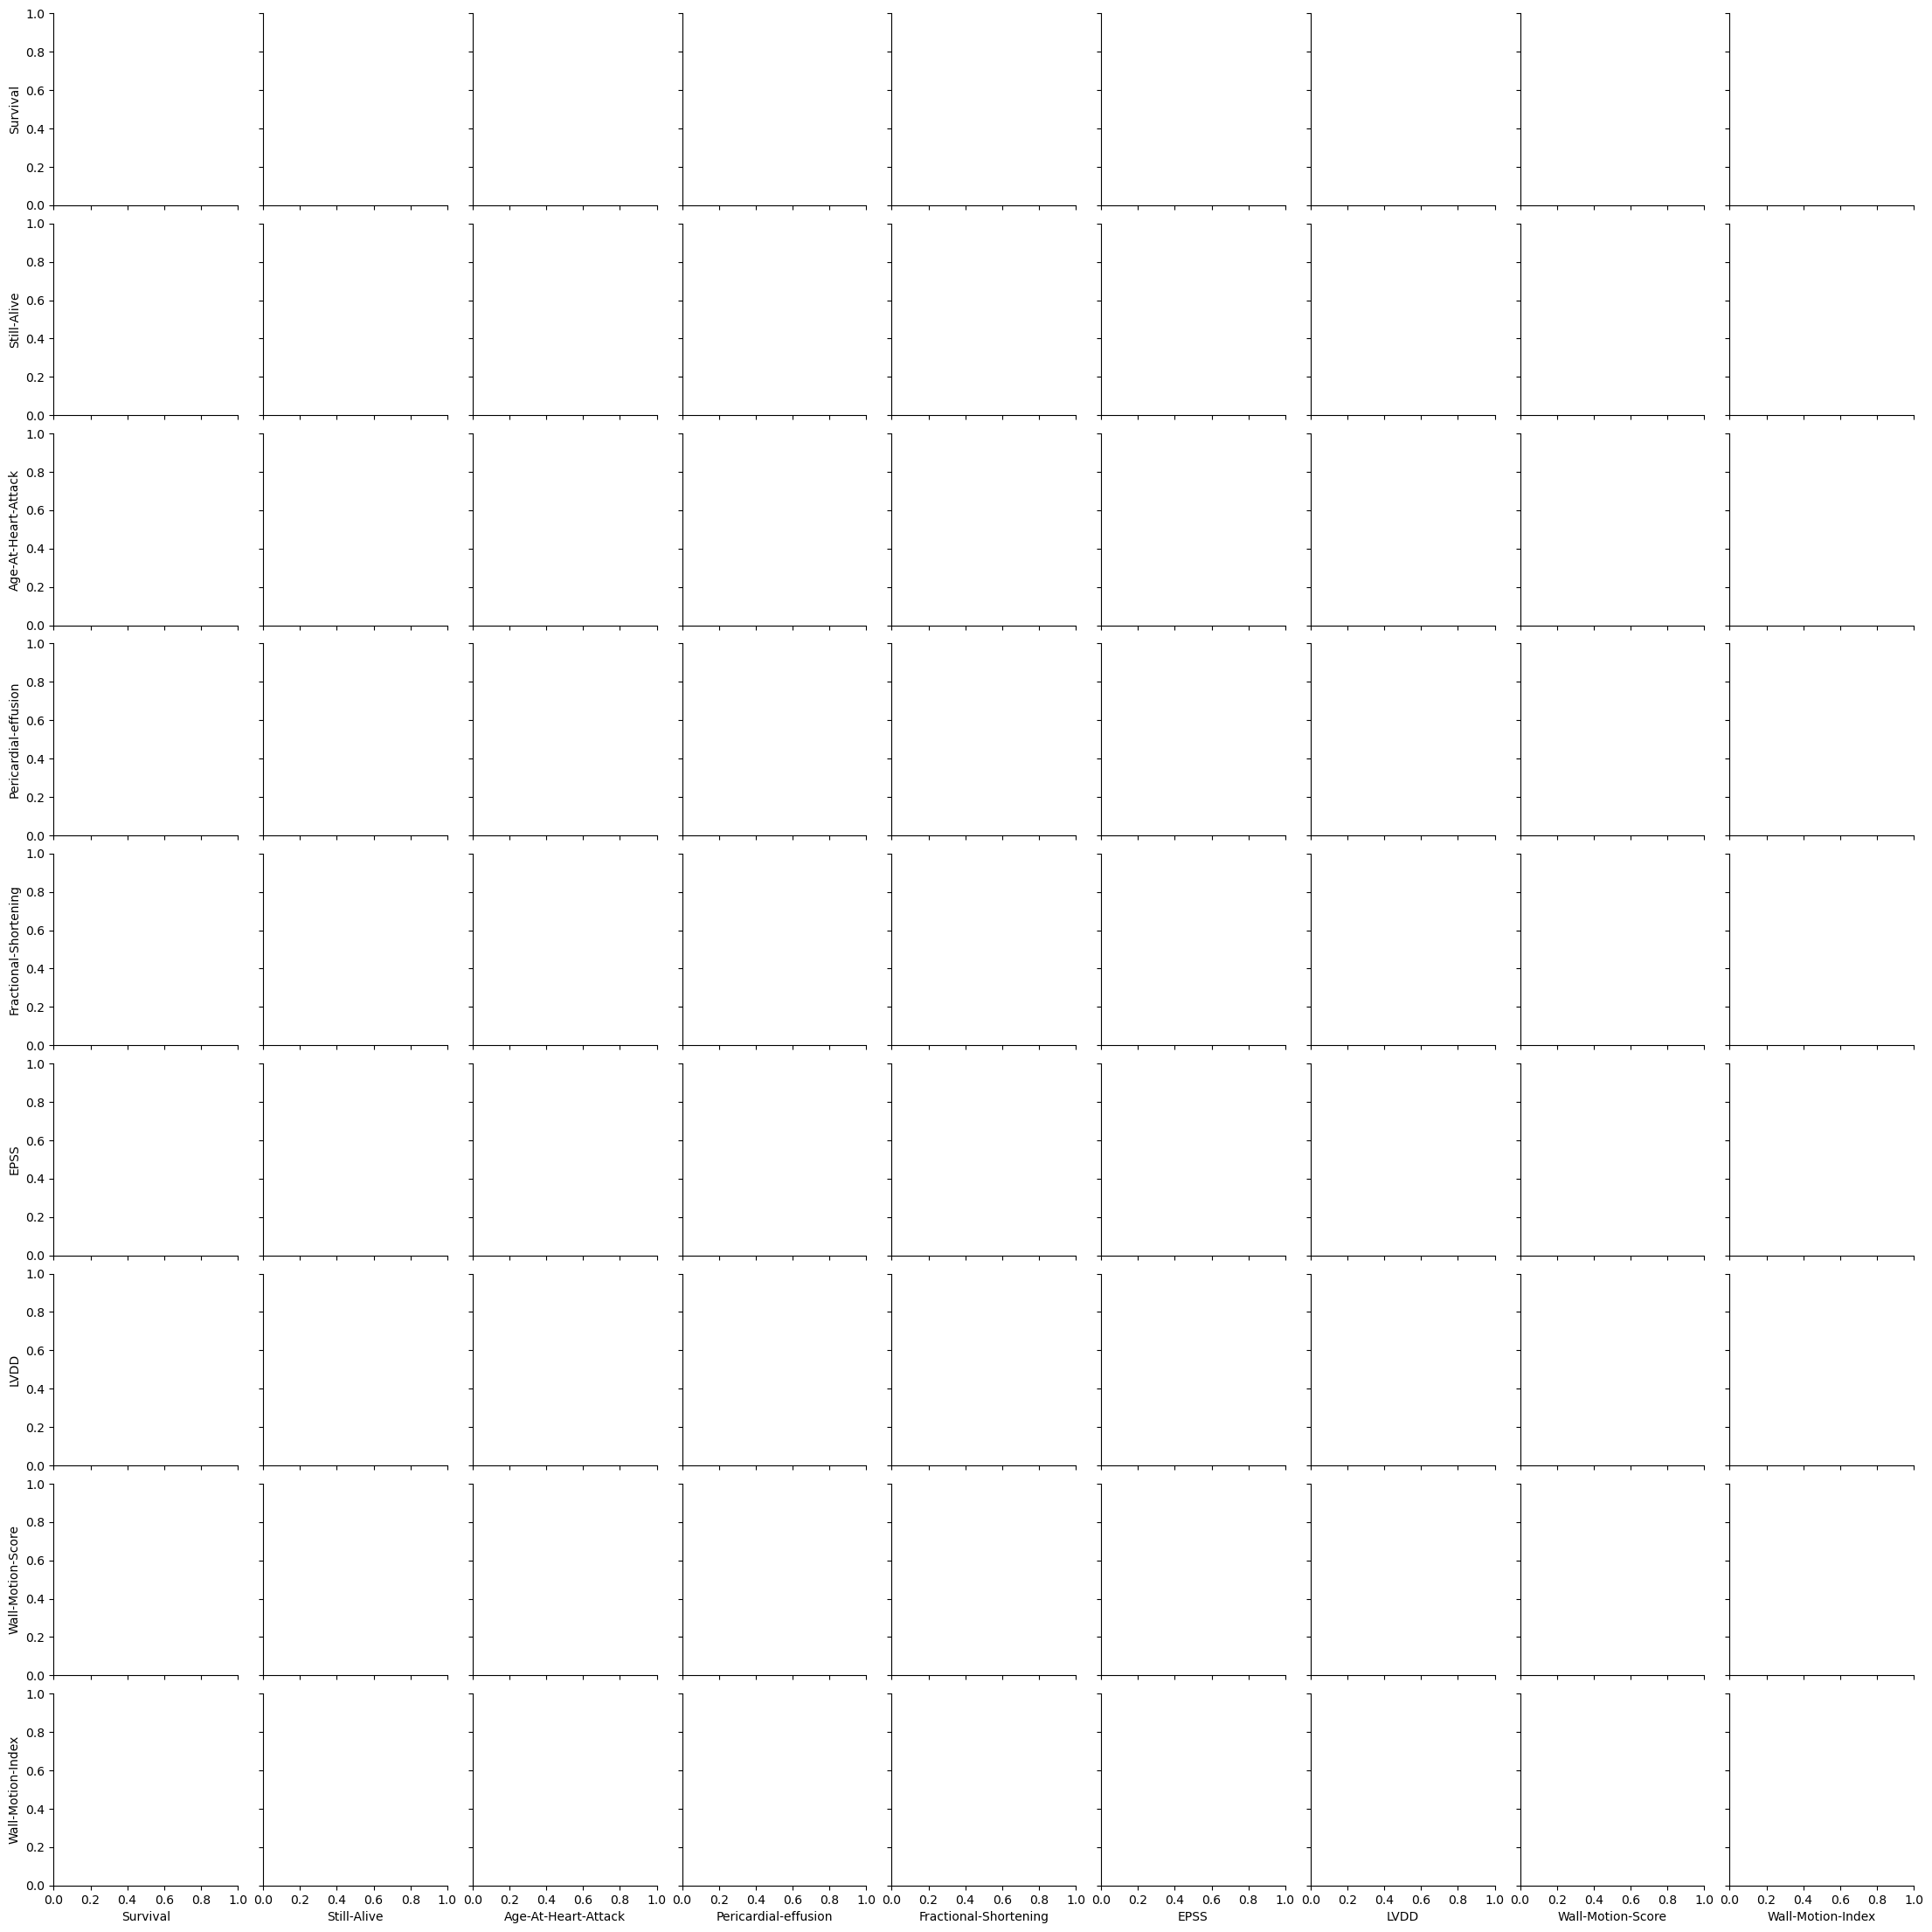

In [67]:
plt.figure()
sns.pairplot(data_wout_nan, hue='Alive-At1') # Include the information of the outcome as the hue 

### Boxplots

We need to remove the 'Still-Alive' and 'Pericardial-effusion' features because they have only 0 and 1 values
As there is only 7 features, the last boxplot is empty. 

In [ ]:
boxplot_data = data_wout_nan.drop(columns=['Still-Alive', 'Pericardial-effusion'])

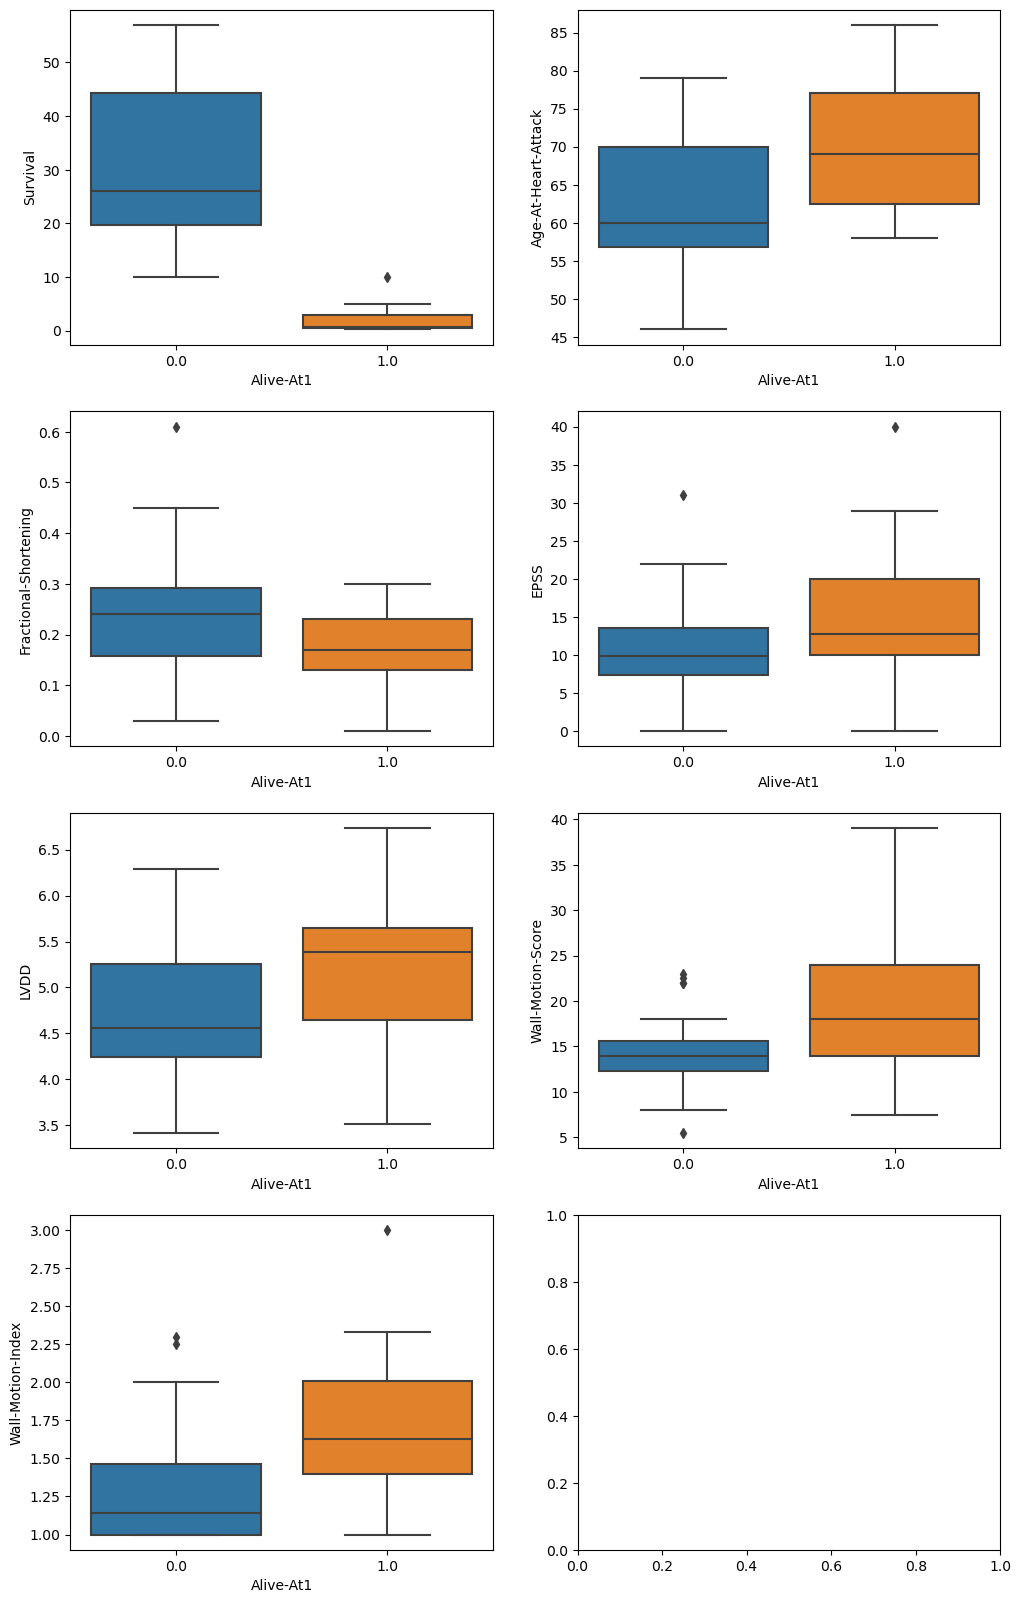

In [ ]:
columns_to_plot = [col for col in boxplot_data.columns if col != 'Alive-At1']

num_rows = 4
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

# Flatten the axes array so that we can iterate over it easily
axes = np.array(axes).flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(x='Alive-At1', y=col, data=boxplot_data, ax=ax)


# Preprocess the data
## Outliers
### a) Identifying outliers with zscore

Must be performed only for the feature that can have different values, not just 0 and 1. 

In [ ]:
from scipy import stats
# calculate z-scores with stats
boxplot_data = boxplot_data.drop(columns=['Alive-At1'])
boxplot_data

KeyError: "['Alive-At1'] not found in axis"

In [ ]:
z_scores = boxplot_data.apply(stats.zscore)

# Here, we are considering 3 times the standard desviation.
# Change this evalute and evalute the results
abs_z_scores = np.abs(z_scores)
no_outliers = (abs_z_scores < 1) # the less you take the standard deviation, the less you keep data
new_data = data_wout_nan[no_outliers]
print("We eliminated", (new_data.size / data_wout_nan.size)*100 , "% of the people in the dataset. There is only", new_data.size, "people left.")

## Check zero values of the dataframe

In [ ]:
(data ==0).sum(axis=0)

Survival                   0
Still-Alive               88
Age-At-Heart-Attack        0
Pericardial-effusion     107
Fractional-Shortening      0
EPSS                       7
LVDD                       0
Wall-Motion-Score          0
Wall-Motion-Index          0
Alive-At1                 50
dtype: int32

There are 7 subjects that have EPSS of 0. EPSS is the E-point septal separation (a distance) so it cannot be zero. Let's replace it with the mean EPSS. 

In [ ]:
# Calculate the mean of non-zero EPSS values
mean_epss = data[data['EPSS'] != 0]['EPSS'].mean()
print("Mean EPSS:", mean_epss)
# Replace 0 values with the mean
data['EPSS'] = data['EPSS'].replace(0, mean_epss)

Mean EPSS: 12.93889090909091


In [ ]:
(data ==0).sum(axis=0)

Survival                   0
Still-Alive               88
Age-At-Heart-Attack        0
Pericardial-effusion     107
Fractional-Shortening      0
EPSS                       0
LVDD                       0
Wall-Motion-Score          0
Wall-Motion-Index          0
Alive-At1                 50
dtype: int32

There is no more 0 value which is troubling us

In [ ]:
data.fillna(data.mean(axis=0), inplace=True)
print(data.iloc[28])
(data==data.mean(axis=0)).sum(axis=0)

Survival                      0.25
Still-Alive                    1.0
Age-At-Heart-Attack           75.0
Pericardial-effusion           0.0
Fractional-Shortening     0.216734
EPSS                     12.164769
LVDD                      4.763157
Wall-Motion-Score        14.438125
Wall-Motion-Index              1.0
Alive-At1                 0.324324
Training                       1.0
Name: 28, dtype: object


Survival                  2
Still-Alive               1
Age-At-Heart-Attack       5
Pericardial-effusion      1
Fractional-Shortening     8
EPSS                     15
LVDD                     11
Wall-Motion-Score         4
Wall-Motion-Index         1
Alive-At1                 0
Training                  0
dtype: int64

# b) Separate your data into training and test sets
## Define the input and output data 

In [ ]:
Y = data['Alive-At1']
Y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
127    <NA>
128    <NA>
129    <NA>
130    <NA>
131    <NA>
Name: Alive-At1, Length: 132, dtype: Float64

In [ ]:
X = data.drop(columns=['Alive-At1'])
X

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index
0,11.0,0.0,71.0,0.0,0.26,9.0,4.6,14.0,1.0
1,19.0,0.0,72.0,0.0,0.38,6.0,4.1,14.0,1.7
2,16.0,0.0,55.0,0.0,0.26,4.0,3.42,14.0,1.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45
4,19.0,1.0,57.0,0.0,0.16,22.0,5.75,18.0,2.25
...,...,...,...,...,...,...,...,...,...
127,7.5,1.0,64.0,0.0,0.24,12.9,4.72,12.0,1.0
128,41.0,0.0,64.0,0.0,0.28,5.4,5.47,11.0,1.1
129,36.0,0.0,69.0,0.0,0.2,7.0,5.05,14.5,1.21
130,22.0,0.0,57.0,0.0,0.14,16.1,4.36,15.0,1.36


## Training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [ ]:
indices_X_train = X_train.index

In [ ]:
labeled_data = data
labeled_data['Training'] = data.index.isin(indices_X_train).astype(float)

In [ ]:
labeled_data.head()

,Survival,Still-Alive,Age-At-Heart-Attack,Pericardial-effusion,Fractional-Shortening,EPSS,LVDD,Wall-Motion-Score,Wall-Motion-Index,Alive-At1,Training
0,11.0,0.0,71.0,0.0,0.26,9.0,4.6,14.0,1.0,0.0,1.0
1,19.0,0.0,72.0,0.0,0.38,6.0,4.1,14.0,1.7,0.0,1.0
2,16.0,0.0,55.0,0.0,0.26,4.0,3.42,14.0,1.0,0.0,1.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.0,0.0
4,19.0,1.0,57.0,0.0,0.16,22.0,5.75,18.0,2.25,0.0,1.0
